In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
train_data = pd.read_csv('train_data_fixed.csv')

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 119 entries, Model.Suffix to Equipment_same_num
dtypes: float64(93), int64(17), object(9)
memory usage: 36.8+ MB


In [92]:
train_data.columns

Index(['Model.Suffix', 'Workorder', 'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       ...
       'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
       'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
       'Head Purge Position Z Collect Result_Fill2',
       'Machine Tact time Collect Result_Fill2',
       'PalletID Collect Result_Fill2', 'Production Qty Collect Result_Fill2',
       'Receip No Collect Result_Fill2', 'WorkMode Collect Result_Fill2',
       'target', 'Equipment_same_num'],
      dtype='object', length=119)

In [93]:
def age_categorize(age):
    if math.isnan(aga):
        return -1
    return math.floor(age / 10) * 10

In [123]:
def plot_func(df, column, target):
    count_df = df.groupby([column, target]).size().unstack(fill_value=0)
    count_df = count_df.div(count_df.sum(axis=1), axis=0)
    count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))
    plt.xlabel(f'{column}')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of Target by {column}')
    plt.legend(title='Target', loc='upper right')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i in range(count_df.shape[0]):
        for j in range(count_df.shape[1]):
            plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='black')


plt.show()

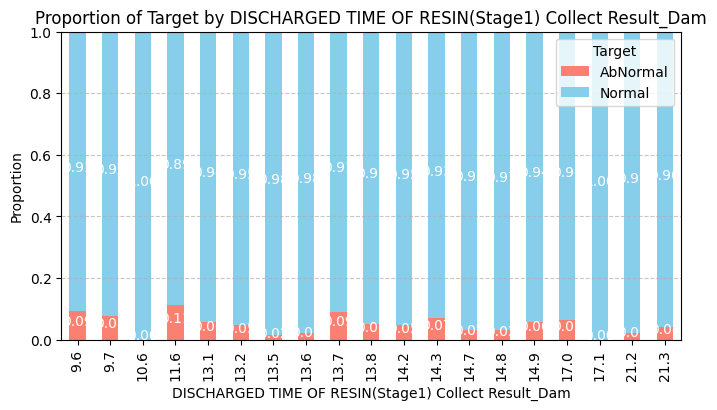

In [95]:
plot_func(train_data, 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam', 'target')

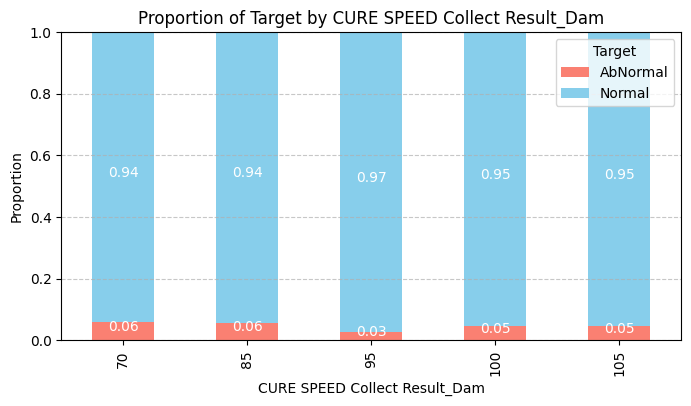

In [96]:
plot_func(train_data, 'CURE SPEED Collect Result_Dam', 'target')

In [97]:
train_data["thickness_sum"] = train_data['THICKNESS 1 Collect Result_Dam'] + train_data['THICKNESS 2 Collect Result_Dam'] + train_data['THICKNESS 3 Collect Result_Dam']  


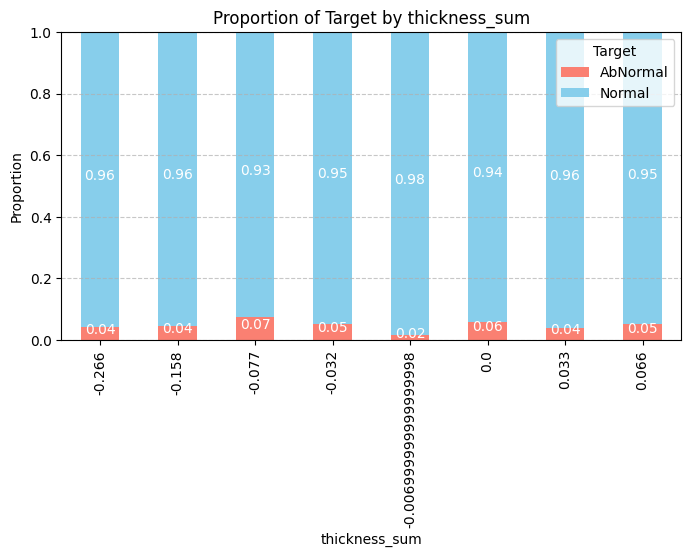

In [98]:
plot_func(train_data, 'thickness_sum', 'target')

# 0.0인 값에 약 36000개 데이터가 몰려있으니까 나머지는 다 정품 예측 후에 0.0 인 항목에 대해서만 예측 진행

In [99]:
train_data['thickness_sum'].value_counts()

thickness_sum
 0.000    35419
-0.158     1649
-0.032     1197
-0.077      964
-0.266      884
 0.033      150
-0.007      125
 0.066      118
Name: count, dtype: int64

In [100]:
train_data['Stage1 Circle2 Distance Speed Collect Result_Dam'].value_counts()

Stage1 Circle2 Distance Speed Collect Result_Dam
6500.0    12539
9000.0    10007
4000.0     6138
5800.0     5295
5000.0     4901
6000.0     1342
6200.0      284
Name: count, dtype: int64

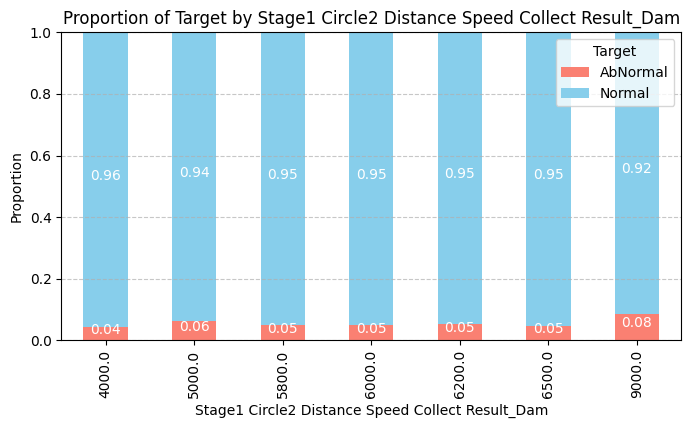

In [101]:
plot_func(train_data, 'Stage1 Circle2 Distance Speed Collect Result_Dam', 'target')

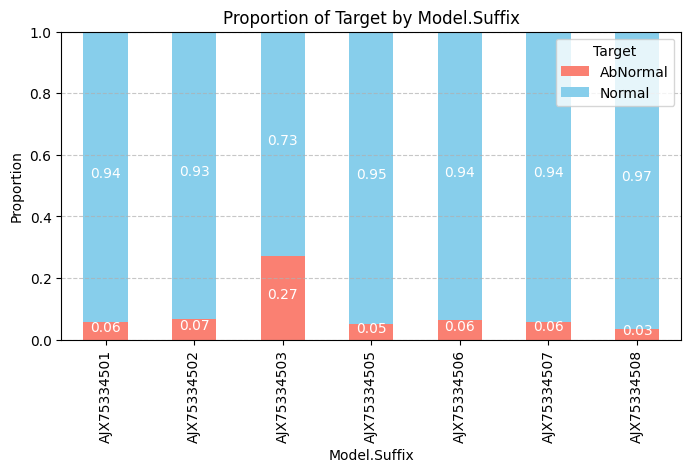

In [102]:
plot_func(train_data, 'Model.Suffix', 'target')

In [103]:
train_data['Model.Suffix'].value_counts()

Model.Suffix
AJX75334501    33820
AJX75334502     3390
AJX75334505     2635
AJX75334507      310
AJX75334503      162
AJX75334506      129
AJX75334508       60
Name: count, dtype: int64

In [104]:
groups = train_data.groupby('Production Qty Collect Result_Dam')

In [105]:
groups.size()

Production Qty Collect Result_Dam
0.0       96
1.0      106
2.0      117
3.0      119
4.0      115
        ... 
604.0      1
605.0      1
606.0      1
607.0      1
608.0      1
Length: 607, dtype: int64

In [106]:
def value_counts_ratio_count(df, col_name, target_name):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))

In [113]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Auto-detect the width
pd.set_option('display.max_colwidth', None) 

In [114]:
value_counts_ratio_count(train_data, 'Production Qty Collect Result_Dam', 'target')


Production Qty Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
0.0       0.177083  0.822917      17.0    79.0     96
1.0       0.132075  0.867925      14.0    92.0    106
2.0       0.059829  0.940171       7.0   110.0    117
3.0       0.084034  0.915966      10.0   109.0    119
4.0       0.034783  0.965217       4.0   111.0    115
5.0       0.059701  0.940299       8.0   126.0    134
6.0       0.084615  0.915385      11.0   119.0    130
7.0       0.070423  0.929577      10.0   132.0    142
8.0       0.061224  0.938776       9.0   138.0    147
9.0       0.039683  0.960317       5.0   121.0    126
10.0      0.072464  0.927536      10.0   128.0    138
11.0      0.097015  0.902985      13.0   121.0    134
12.0      0.096296  0.903704      13.0   122.0    135
13.0      0.065693  0.934307       9.0   128.0    137
14.0      0.075342  0.924658      11.0   135.0    146
15.0      0.075758  0.924242  

In [112]:
#PCA 준비
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, epsilon = 40506, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=epsilon)
print(d)

9093


In [115]:
# 100단위로 묶는 함수 정의
def group_by_hundreds(value):
    return (value // 100) * 100

# 새로운 파생변수 추가
train_data['Production Qty Collect Result_Dam_Grouped'] = train_data['Production Qty Collect Result_Dam'].apply(group_by_hundreds)

# 결과 확인
train_data[['Production Qty Collect Result_Dam', 'Production Qty Collect Result_Dam_Grouped']].head()


,Production Qty Collect Result_Dam,Production Qty Collect Result_Dam_Grouped
0,127.0,100.0
1,185.0,100.0
2,73.0,0.0
3,268.0,200.0
4,121.0,100.0


In [116]:
value_counts_ratio_count(train_data, 'Production Qty Collect Result_Dam_Grouped', 'target')


Production Qty Collect Result_Dam_Grouped별 target 비율 및 갯수

          AbNormal    Normal  AbNormal   Normal  Total
variable                                              
0.0       0.065255  0.934745     832.0  11918.0  12750
100.0     0.052283  0.947717     607.0  11003.0  11610
200.0     0.058585  0.941415     564.0   9063.0   9627
300.0     0.054651  0.945349     255.0   4411.0   4666
400.0     0.048593  0.951407      76.0   1488.0   1564
500.0     0.057762  0.942238      16.0    261.0    277
600.0     0.000000  1.000000       0.0     12.0     12


In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 121 entries, Model.Suffix to Production Qty Collect Result_Dam_Grouped
dtypes: float64(95), int64(17), object(9)
memory usage: 37.4+ MB


In [119]:
train_data.columns

Index(['Model.Suffix', 'Workorder', 'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       ...
       'Head Purge Position Z Collect Result_Fill2',
       'Machine Tact time Collect Result_Fill2',
       'PalletID Collect Result_Fill2', 'Production Qty Collect Result_Fill2',
       'Receip No Collect Result_Fill2', 'WorkMode Collect Result_Fill2',
       'target', 'Equipment_same_num', 'thickness_sum',
       'Production Qty Collect Result_Dam_Grouped'],
      dtype='object', length=121)

In [120]:
train_data = train_data.drop(columns=['THICKNESS 1 Collect Result_Dam', 'THICKNESS 2 Collect Result_Dam', 'THICKNESS 3 Collect Result_Dam'])

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 118 entries, Model.Suffix to Production Qty Collect Result_Dam_Grouped
dtypes: float64(92), int64(17), object(9)
memory usage: 36.5+ MB


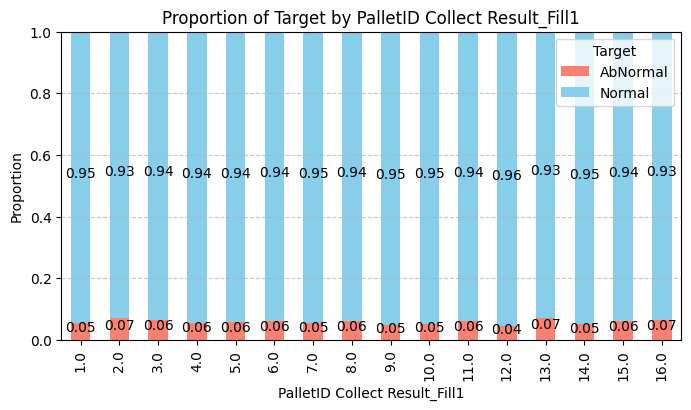

In [124]:
plot_func(train_data, 'PalletID Collect Result_Fill1', 'target')

In [129]:
train_data["sum_x_head_coordinate"] = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] + train_data['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam'] + train_data['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam'] 

In [130]:
train_data["sum_z_head_coordinate"] = train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam'] + train_data['HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam'] + train_data['HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam'] 

In [131]:
train_data["sum_y_head_coordinate"] = train_data['HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam'] + train_data['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam'] + train_data['HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam'] 

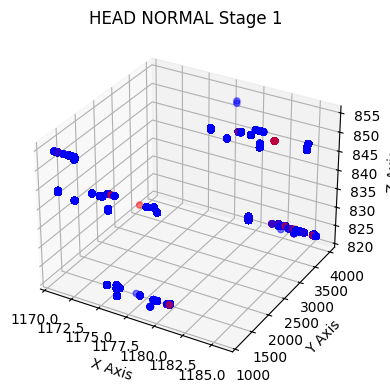

In [139]:
# Create a 3D plot for each stage with the specified settings
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))

color_map = {'AbNormal': 'red', 'Normal': 'blue'}
train_data['color'] = train_data['target'].map(color_map)

colors = train_data['color']

# Plot for Stage 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train_data["sum_x_head_coordinate"], 
            train_data["sum_y_head_coordinate"], 
            train_data["sum_z_head_coordinate"], c=colors, alpha=0.5)
            
ax1.set_title('HEAD NORMAL Stage 1')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')

# Display the plot
plt.show()

In [140]:
train_data["sum_x_headco_fill1"] = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1']
train_data["sum_y_headco_fill1"] = train_data['HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1'] 
train_data["sum_z_headco_fill1"] = train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1'] 


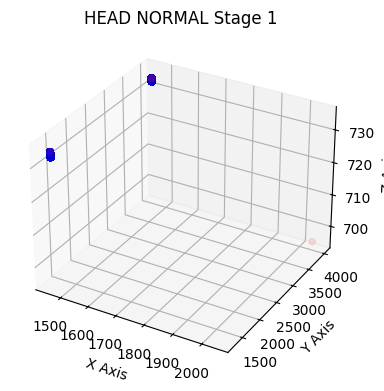

In [188]:
# Create a 3D plot for each stage with the specified settings
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))

color_map = {'AbNormal': 'red', 'Normal': 'blue'}
train_data['color'] = train_data['target'].map(color_map)

colors = train_data['color']

# Plot for Stage 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train_data["sum_x_headco_fill1"], 
            train_data["sum_y_headco_fill1"], 
            train_data["sum_z_headco_fill1"], c=colors, alpha=0.1)
            
ax1.set_title('HEAD NORMAL Stage 1')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')

# Display the plot
plt.show()


#이 결과를 보면 오른쪽 밑에 희미한 점은 값 1개이므로 큰 의미 없고, 두개의 점 위치에 다 몰려있으니까 컬럼들을 다 삭제해도 좋을듯함

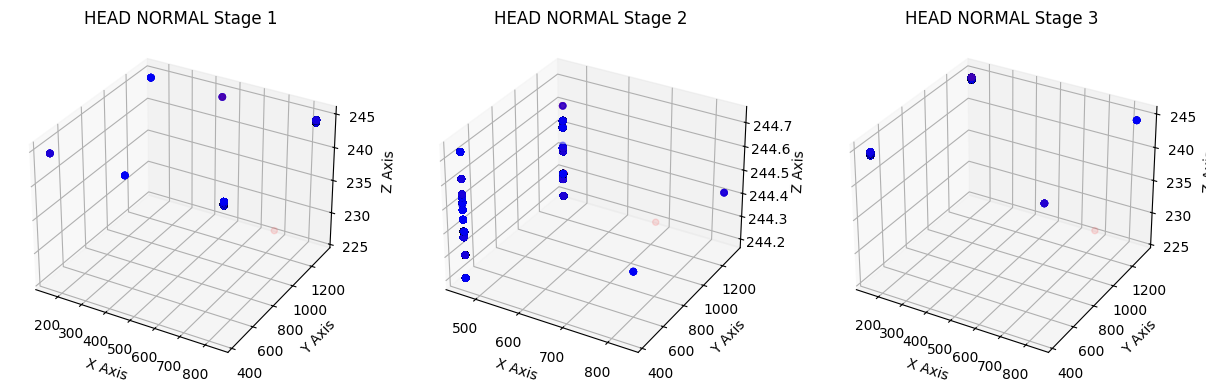

In [187]:
# Create a 3D plot for each stage with the specified settings
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))

color_map = {'AbNormal': 'red', 'Normal': 'blue'}
train_data['color'] = train_data['target'].map(color_map)

colors = train_data['color']

# Plot for Stage 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'], 
            train_data['HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1'], 
            train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1'], c=colors, alpha=0.1)
            
ax1.set_title('HEAD NORMAL Stage 1')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')

# Plot for Stage 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(train_data['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1'], 
            train_data['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1'], 
            train_data['HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1'], c=colors, alpha=0.1)
            
ax2.set_title('HEAD NORMAL Stage 2')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')

# Plot for Stage 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(train_data['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1'], 
            train_data['HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1'], 
            train_data['HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1'],  c=colors, alpha=0.1)
            
ax3.set_title('HEAD NORMAL Stage 3')
ax3.set_xlabel('X Axis')
ax3.set_ylabel('Y Axis')
ax3.set_zlabel('Z Axis')

# Display the plot
plt.show()

In [146]:
value_counts_ratio_count(train_data, 'sum_z_headco_fill1', 'target')


sum_z_headco_fill1별 target 비율 및 갯수

          AbNormal    Normal  AbNormal   Normal  Total
variable                                              
695.900   1.000000  0.000000       1.0      0.0      1
732.600   0.076474  0.923526     249.0   3007.0   3256
732.825   0.048825  0.951175      27.0    526.0    553
732.900   0.063154  0.936846     682.0  10117.0  10799
733.125   0.045714  0.954286      24.0    501.0    525
733.200   0.060615  0.939385     834.0  12925.0  13759
733.245   0.049435  0.950565      35.0    673.0    708
733.281   0.000000  1.000000       0.0      4.0      4
733.350   0.021703  0.978297      13.0    586.0    599
733.470   0.018657  0.981343       5.0    263.0    268
733.515   0.042017  0.957983     130.0   2964.0   3094
733.533   0.071429  0.928571       1.0     13.0     14
733.560   0.054150  0.945850     107.0   1869.0   1976
733.600   0.363636  0.636364       8.0     14.0     22
733.605   0.061505  0.938495     112.0   1709.0   1821
733.629   0.042424  0.957576

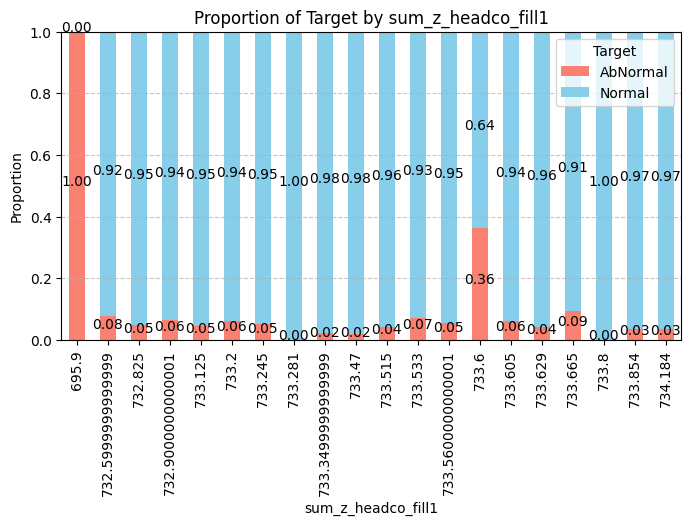

In [147]:
plot_func(train_data, 'sum_z_headco_fill1', 'target')

In [148]:
value_counts_ratio_count(train_data, 'sum_y_headco_fill1', 'target')


sum_y_headco_fill1별 target 비율 및 갯수

          AbNormal    Normal  AbNormal   Normal  Total
variable                                              
1289.4    0.100000  0.900000       2.0     18.0     20
1290.1    0.048522  0.951478     110.0   2157.0   2267
1290.9    0.039683  0.960317       5.0    121.0    126
1291.2    0.093474  0.906526     593.0   5751.0   6344
1291.3    0.078571  0.921429      22.0    258.0    280
1291.5    0.047619  0.952381       1.0     20.0     21
1291.8    0.045267  0.954733      88.0   1856.0   1944
1292.4    0.047130  0.952870     661.0  13364.0  14025
3968.5    0.046166  0.953834     121.0   2500.0   2621
3968.7    0.000000  1.000000       0.0      4.0      4
3969.0    0.094374  0.905626     104.0    998.0   1102
3969.1    0.047757  0.952243     445.0   8873.0   9318
3969.6    0.015385  0.984615       1.0     64.0     65
3969.6    0.082248  0.917752     101.0   1127.0   1228
3972.6    0.027027  0.972973       1.0     36.0     37
3973.3    0.047936  0.952064

In [149]:
value_counts_ratio_count(train_data, 'sum_x_headco_fill1', 'target')


sum_x_headco_fill1별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
1451.5    0.057411  0.942589      55.0   903.0    958
1451.8    0.052632  0.947368       1.0    18.0     19
1452.0    0.031553  0.968447      26.0   798.0    824
1452.1    0.026810  0.973190      20.0   726.0    746
1452.3    0.055556  0.944444      62.0  1054.0   1116
1452.4    0.041237  0.958763       4.0    93.0     97
1452.5    0.059200  0.940800      37.0   588.0    625
1452.7    0.014706  0.985294       1.0    67.0     68
1452.8    0.039922  0.960078      41.0   986.0   1027
1452.9    0.065157  0.934843     118.0  1693.0   1811
1452.9    0.015385  0.984615       1.0    64.0     65
1453.0    0.041260  0.958740      93.0  2161.0   2254
1453.4    0.071429  0.928571       1.0    13.0     14
1453.5    0.060441  0.939559     433.0  6731.0   7164
1453.6    0.047619  0.952381       2.0    40.0     42
1453.7    0.042840  0.957160     181.0  4044.

In [159]:
train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1
838.4    17962
837.9    11100
837.7     7164
838.1     2010
837.4     1782
838.2      267
458.7       86
157.0       67
156.1       65
837.5        2
681.2        1
Name: count, dtype: int64

In [161]:
train_data['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1'].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1
458.8    7587
458.5    7099
458.3    6883
458.4    4801
460.0    4615
458.7    4183
457.8    1669
459.5    1196
457.9     924
458.1     746
458.6     231
457.6     192
459.2     128
457.7      97
458.2      60
838.4      56
838.1      30
459.0       4
460.5       3
458.0       1
682.5       1
Name: count, dtype: int64

In [162]:
train_data['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1'].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1
157.0    25669
157.5     4920
156.8     3169
156.1     2805
156.3     1782
156.5     1718
158.0      268
838.4       67
838.1       65
157.7       38
156.7        4
681.2        1
Name: count, dtype: int64

In [167]:
list = []
for i in train_data['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1']:
    if i > 200:
        list.append(i)

In [165]:
list

[838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.4,
 838.1,
 838.1,
 838.4,
 838.1,
 838.1,
 838.4,
 838.4,
 838.1,
 838.4,
 838.4,
 838.1,
 838.4,
 838.4,
 838.4,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.1,
 838.4,
 838.4,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.1,
 838.4,
 838.4,
 838.4,
 838.4,
 838.4,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.4,
 838.4,
 838.4,
 838.4,
 838.4,
 838.4,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.4,
 838.4,
 838.4,
 838.4,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 838.4,
 838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 838.4,
 838.1,
 838.1,
 838.1,
 838.4,
 838.1,
 838.1,
 838.1,
 838.1,
 838.1,
 838.4,
 838.4,
 838.1,
 838.1,
 838.4,
 838.4,
 838.4,
 838.4,
 838.1,
 838.4,
 838.4,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 838.1,
 838.4,
 681.2,
 838.1,
 838.4,
 838.1,
 838.1,


In [168]:
def get_indices_of_value(df, column_name, value):
    return df[df[column_name] == value].index

In [177]:
a = get_indices_of_value(train_data, 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1', 838.4)

In [179]:
a

Index([  569,  1542,  2897,  3502,  5472,  5648,  6276,  6282,  6464,  6976,
        6994,  7384,  8252,  8402,  8416,  8843, 10533, 10610, 10688, 11142,
       11382, 11939, 13387, 13567, 13570, 13726, 13773, 14079, 14852, 14854,
       15667, 16377, 18072, 19153, 19529, 19547, 19879, 20373, 21265, 22937,
       23180, 23935, 24023, 24315, 25090, 26709, 27001, 27261, 28944, 30280,
       30651, 31878, 32126, 32936, 33217, 33315, 34260, 34319, 35338, 35947,
       36892, 36929, 38505, 39421, 39677, 39779, 39938],
      dtype='int64')

In [180]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 125 entries, Model.Suffix to sum_z_headco_fill1
dtypes: float64(98), int64(17), object(10)
memory usage: 38.6+ MB


In [181]:
train_data.columns

Index(['Model.Suffix', 'Workorder', 'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       ...
       'Equipment_same_num', 'thickness_sum',
       'Production Qty Collect Result_Dam_Grouped', 'sum_x_head_coordinate',
       'sum_y_head_coordinate', 'sum_z_head_coordinate', 'color',
       'sum_x_headco_fill1', 'sum_y_headco_fill1', 'sum_z_headco_fill1'],
      dtype='object', length=125)

In [183]:
for i in a:
    print(train_data.iloc[i,114])

Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
AbNormal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
AbNormal
Normal
AbNormal
Normal
AbNormal
Normal
Normal
Normal
AbNormal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
AbNormal
Normal
Normal
Normal
Normal
Normal
AbNormal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal


In [184]:
a = get_indices_of_value(train_data, 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1', 838.1)

In [185]:
len(a)

65

In [186]:
for i in a:
    print(train_data.iloc[i,114])

Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
AbNormal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal


In [ ]:
train_data["sum_x_headco_fill1"] = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1']
train_data["sum_y_headco_fill1"] = train_data['HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1'] 
train_data["sum_z_headco_fill1"] = train_data['HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1'] + train_data['HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1'] 

In [189]:
a = get_indices_of_value(train_data, 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2', 'OK')

In [196]:
a

Index([    2,     6,     7,    10,    11,    17,    19,    20,    21,    23,
       ...
       40470, 40472, 40473, 40479, 40482, 40488, 40494, 40495, 40499, 40503],
      dtype='int64', length=11293)

In [199]:
b = []
for i in a:
    b.append(train_data.iloc[i,114])
        

In [200]:
len(b)

11293

In [205]:
b.count('Normal')

10797